<a href="https://colab.research.google.com/github/marce3-2140/Haemoglobin-Level-Prediction/blob/main/SurveyClinicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/fralfaro/CD-DS-Course/blob/main/docs/extra_project_template/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**📈 Clinical, Anthropometric & Bio-Chemical Survey**



**Presentado por:** Marcela Giraldo

* **Tomado de:** [kaggle.com/datasets/rajanand/cab-survey](https://www.kaggle.com/datasets/rajanand/cab-survey)
* **fecha de publicación:** Tue Aug 08/2017 14:16:18
* **Track**: Clasificar las características de la encuesta anual de casos de mortalidad analizando los niveles de hemoglobina para determinar si presentaban anemia.
* **Autor:** Rajanand Ilangovan.
* **cita**: Department of Health and Family Welfare, Govt. of India has published this data in Open Govt Data Platform India portal under Govt. Open Data License - India. ([link](https://data.gov.in/government-open-data-license-india))
* **Licence:** CC BY-SA 4.0


**Contexto:**
___

> _*Este conjunto de datos a nivel de unidad contiene los detalles de la encuesta clínica, antropométrica y bioquímica (CAB). Para complementar la información proporcionada por la Encuesta Anual de Salud (AHS) , se ha introducido un componente de biomarcadores para recopilar datos sobre el estado nutricional, enfermedades del estilo de vida como diabetes e hipertensión y anemia en los estados del Empowered Action Group y Assam. Este componente, a saber, la encuesta clínica, antropométrica y bioquímica (CAB), se lleva a cabo en una submuestra de peste equina, para el modelo tomamos una submuestra con los estados de Uttarakhand, Assam y Chhattisgarh. Hay un total de 315092 mil observaciones y 54 variables en este conjunto de datos.*_

> **Encuesta:**
Encuesta de referencia: 2010-11 (4,14 millones de hogares en la muestra)
  * 1.ª actualización: 2011-12 (4,28 millones de hogares en la muestra)
  * 2.ª actualización: 2012-13 (4,32 millones de hogares en la muestra)
  * Estos nueve estados, que representan alrededor del 48 por ciento de la población total, el 59 por ciento de los nacimientos, el 70 por ciento de las muertes infantiles, el 75 por ciento de las muertes de menores de 5 años y el 62 por ciento de las muertes maternas en el país, son los estados de mayor enfoque en vista de su fertilidad y mortalidad relativamente más altas.

> **Objetivos del análisis:**
-  [x] Basándonos en las descripciones de las variables proporcionadas, algunas posibles variables objetivo podrían estar relacionadas con las condiciones de salud y enfermedades específicas que se mencionan en la encuesta.
- [x] Haemoglobin_level: Si el objetivo es estudiar la anemia en la población encuestada, esta variable podría ser una opción para medir los niveles de hemoglobina y evaluar la presencia de anemia.
- [x] Diabetes_test y fasting_blood_glucose_mg_dl: Si el objetivo es analizar la diabetes, estas variables pueden ser útiles para estudiar la prevalencia de diabetes y los niveles de glucosa en ayunas.
- [x] BP_systolic y BP_Diastolic: Si el objetivo es estudiar la presión arterial, estas variables pueden ser utilizadas para analizar la presión arterial sistólica y diastólica.
- [x] Illness_type: Evaluar la prevalencia de enfermedades agudas en la población, esta variable puede ser relevante para identificar el tipo de enfermedades agudas experimentadas en los últimos 15 días.

#### **Importe de Librerías**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Carga de Datos**

**DataSet deL estado de UTTARAKHAND donde se aplico la encuesta**

___

In [3]:
file_UT = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_05_UT.csv'
df_UT = pd.read_csv(file_UT, low_memory = False)#Es necesario especificar low_memory porque hay tipos de datos mixtos.
df_UT["State"]="UTTARAKHAND"
df_UT.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,5,1,2,0,2824556,29,4,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
1,5,1,2,0,2824557,28,3,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
2,5,1,2,0,2824558,97,5,20/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
3,5,1,2,0,2823671,32,1,15/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND
4,5,1,2,0,2824555,26,7,19/05/2014,30,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,UTTARAKHAND


**DataSet del estado de ASSAM donde se aplico la encuesta**

___

In [4]:
file_AS = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_18_AS.csv'
df_AS = pd.read_csv(file_AS, low_memory=False)
df_AS["State"]="ASSAM"
df_AS.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,18,1,1,2,1075624,130,1,12/08/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
1,18,1,1,1,1077449,82,1,12/02/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
2,18,1,1,2,1074487,25,1,12/01/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
3,18,1,1,2,1076125,424,1,13/12/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM
4,18,1,1,1,1076804,90,1,29/11/2014,30,3,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,ASSAM


**DataSet del estado de CHHATTISGARH donde se aplico la encuesta**

___

In [5]:
file_CT = '/content/drive/MyDrive/CodingDojo/ProjectsCodingDojo/Proyecto2/DatosAntropometricosIndia/CAB_22_CT.csv'
df_CT = pd.read_csv(file_CT, low_memory=False)
df_CT["State"]="CHHATTISGARH"
df_CT.head()

,state_code,district_code,rural_urban,stratum,psu_id,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
0,22,1,1,1,1434366,9,2,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
1,22,1,1,1,1434444,9,2,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
2,22,1,1,1,1434093,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
3,22,1,1,1,1434117,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH
4,22,1,1,1,1434315,11,1,6/11/2014,15,3,...,-1,-1,-1,-1,-1,-1,-1,-1,NaN,CHHATTISGARH


**Concatenar Los Datos En Uno Solo DataFrame**

In [7]:
#Concatenamos
df = pd.concat([df_UT,df_AS, df_CT], ignore_index=True)
# Reemplazamos el indice por la columna de registro unico de encuesta psu_id
df.set_index('psu_id', inplace = True)
df.head()

,state_code,district_code,rural_urban,stratum,ahs_house_unit,house_hold_no,date_survey,test_salt_iodine,record_code_iodine,record_code_iodine_reason,...,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54,State
psu_id,,,,,,,,,,,,,,,,,,,,,
2824556,5,1,2,0,29,4,19/05/2014,30,3,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
2824557,5,1,2,0,28,3,19/05/2014,30,3,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
2824558,5,1,2,0,97,5,20/05/2014,30,3,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
2823671,5,1,2,0,32,1,15/05/2014,30,3,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND
2824555,5,1,2,0,26,7,19/05/2014,30,3,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,UTTARAKHAND


## **I. Análisis Exploratorio de Datos**

**Cuantas Columnas Y Filas Tiene El Conjunto De Datos**

In [8]:
data_original = df.shape
data_original

(315097, 54)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315097 entries, 2824556 to 1529477
Data columns (total 54 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   state_code                        315097 non-null  object 
 1   district_code                     315097 non-null  int64  
 2   rural_urban                       315097 non-null  object 
 3   stratum                           315097 non-null  int64  
 4   ahs_house_unit                    315097 non-null  int64  
 5   house_hold_no                     315097 non-null  int64  
 6   date_survey                       315097 non-null  object 
 7   test_salt_iodine                  315097 non-null  int64  
 8   record_code_iodine                315097 non-null  int64  
 9   record_code_iodine_reason         94148 non-null   object 
 10  sl_no                             315097 non-null  int64  
 11  sex                               315097 non-

## **II. Limpieza de datos**

**Tratamiento de Duplicados**

In [10]:
df.duplicated().sum()

5

In [11]:
df = df.drop_duplicates()

**Eliminación De variables inncesarias**

| Columna                     | Descripcion                                                                                                    |
|-----------------------------|----------------------------------------------------------------------------------------------------------------|
| 'state_code'                |                                                                                                                |
| 'ahs_house_unit'            | Numero de casa                                                                                                 |
| 'house_hold_no'             | Numero de hogar                                                                                                |
| 'record_code_iodine_reason' | Razon de no aceptar test de yodo                                                                               |
| 'sl_no'                     | Cada registro de casa tiene un numero serial.                                                                  |
| 'usual_residence'           | Si el miembro es residente habitual                                                                            |
| 'usual_residence_reason'    | Razon de porque no es residente habitual                                                                       |
| 'identification_code'       | Numero de identificacion                                                                                       |
| 'stratum'                   | "1 or 2 solo cuando [rural_urban] = 1, or 0 cuando [rural_urban] = 2, esta informacion ya esta en  rural_urban |
| 'district_code'             | Codigo de distrito, ya tenemos State.                                                                          |

In [12]:
df = df.drop(columns=['state_code', 'ahs_house_unit', 'house_hold_no',
                      'record_code_iodine_reason', 'sl_no', 'usual_residance',
                      'usual_residance_reason','identification_code',
                      'stratum', 'district_code'
                      ])

**Identificamos datos nulos en el dataFrame**

In [13]:
df.isna().sum()

rural_urban                              0
date_survey                              0
test_salt_iodine                         0
record_code_iodine                       0
sex                                      0
age_code                                 2
age                                      2
date_of_birth                            2
month_of_birth                           2
year_of_birth                            2
weight_measured                          2
weight_in_kg                             2
length_height_measured                   2
length_height_code                       2
length_height_cm                         2
haemoglobin_test                         2
haemoglobin                              2
haemoglobin_level                        2
bp_systolic                              2
bp_systolic_2_reading                    2
bp_diastolic                             2
bp_diastolic_2reading                    2
pulse_rate                               2
pulse_rate_

**Proporción de Cantidad de Nulos de Cada Característica**

In [14]:
v54_missing = (df['v54'].isna().sum()/len(df))*100
print(f"La columna 'v54' tiene {v54_missing:.2f}% de datos nulos")

age_code_missing = (df['age_code'].isna().sum()/len(df))
print(f"La columna 'age_code' tiene {age_code_missing:.2f}% de datos nulos")

ilness_missing = (df['illness_duration'].isna().sum()/len(df))
print(f"La columna 'ilness_duration' tiene {ilness_missing:.2f}% de datos nulos")

La columna 'v54' tiene 100.00% de datos nulos
La columna 'age_code' tiene 0.00% de datos nulos
La columna 'ilness_duration' tiene 0.00% de datos nulos


> **Nota**:
* La columna V54 tiene el 100% de los datos nulos, asi que eliminaremos esta columna ya que no tenemos ninguna informacion para sacar la mediana u otro.
* Eliminamos las filas con datos nulos de columnas como age_code y ilness_type entre otras, con datos perdidos minimos que representan el 0.0001%, ademas encontramos que estan relacionadas estas filas con nulos en todas las columnas con nulos.

In [15]:
df = df.drop('v54', axis=1)

In [16]:
df = df.dropna()

### **Tomamos Un Subconjunto de Datos**

___

* Los datos de las encuestas incluyen información de lactantes, niños, adolescentes y adultos, por lo que todas las columnas no aplican a todas las edades, generando datos nulos e inconsistentes cuando no aplica.

* Para el estudio eliminamos las columnas aplicables para adultos, madres gestantes, madres lactantes y niños que superan en promedio la edad de lactancia > 2 años.

* Tomamos un subconjunto de datos con la información de lactantes que a su vez se dubdivide en:

  * [x] Recien nacido (0 a 6 dias)
  * [x] Neonato (7-29 días)
  * [x] Lactancia (lactante menor; 1-12 meses de vida, lactante mayor; 1-2 años)
___

Eliminamos las columnas que no corresponden a niños en periodo de lactancia menor.

In [25]:
df = df.drop(columns=['marital_status', 'gauna_perfor_not_perfor', 'duration_pregnanacy'])

**Variables Relacionadas con la Edad De Los Encuestados**

* age_code: Unidad de registro de la edad
* age
* date_of_birth: DD
* month_of_birth: MM
* year_of_birth: YY

Eliminaremos las columnas innecesarias relacionadas, solo necesitamos la variable 'age' y 'age_code' para identificar la informacion de edad del encuestado.

In [26]:
df = df.drop(columns=['date_of_birth', 'month_of_birth', 'year_of_birth'])

In [27]:
df['age_code'].value_counts()

Y    311896
M      3119
D        67
y         4
m         2
Name: age_code, dtype: int64

In [28]:
# Reemplazar los datos inconsistentes de age_code

# Mapear los valores en 'age_code' a números
mapping = {'D': 0, 'M': 1, 'm': 1, 'Y': 2, 'y': 2}
df['age_code'] = df['age_code'].map(mapping)

In [29]:
df['age_code'] = df['age_code'].astype(int)
df['age_code'].value_counts()

2    311900
1      3121
0        67
Name: age_code, dtype: int64

**Dividimos y Analizamos el contenido de las columnas aplicando el filtro de menores de 5 años (age_code: 0 y 1).**

In [30]:
data_mayores = df['age_code'] == 2
data_mayores.sum()

311900

In [31]:
data_menores = df['age_code'] <= 1
data_menores.sum()

3188

In [34]:
#Con cuantos datos nos quedamos
data_old = print(f"Data Orignal de los tres datasets: {data_original}")
new_data = print(f"Data del subconjunto: {df.shape}")

Data Orignal de los tres datasets: (315097, 54)
Data del subconjunto: (3188, 37)


In [45]:
#age_code <= 1 incluye (0 = Dias, 1 = Meses)
df = df.loc[df['age_code'] <= 1]
df.head()

,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight_measured,weight_in_kg,length_height_measured,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
psu_id,,,,,,,,,,,,,,,,,,,,,
2824575,2,20/05/2014,30,3,2,1,4.0,4.0,-1.0,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2831091,2,24/08/2014,30,3,2,1,3.0,1.0,3.5,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
2831092,2,21/08/2014,30,3,1,1,2.0,1.0,4.6,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
2831093,2,22/08/2014,30,3,1,1,2.0,1.0,6.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,UTTARAKHAND
2831086,2,23/08/2014,30,3,2,1,10.0,1.0,7.1,1.0,...,6.0,6.0,6.0,9.0,9.0,9.0,0.0,-1.0,-1.0,UTTARAKHAND


In [33]:
df['age_code'].value_counts()

1    3121
0      67
Name: age_code, dtype: int64

**Revisamos y Reemplazamos Valores Inconsistentes**

In [49]:
# Características Categóricas
cat = df.select_dtypes(include='object')
cat.columns

Index(['rural_urban', 'date_survey', 'length_height_code',
       'day_or_month_for_breast_feeding_', 'State'],
      dtype='object')

In [51]:
#Convertimos la variable de fecha a pd.to_datetime
df['date_survey'] = pd.to_datetime(df['date_survey'])

<ipython-input-51-5b0424183e97>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_survey'] = pd.to_datetime(df['date_survey'])


In [52]:
df['date_survey'].value_counts()

2014-07-22    62
2014-10-10    31
2014-08-11    30
2014-10-28    28
2014-10-30    27
              ..
2014-03-01     1
2014-12-24     1
2014-06-04     1
2014-03-08     1
2014-09-15     1
Name: date_survey, Length: 421, dtype: int64

**rural_urban**

Reemplazamos datos inconsistentes y cambiamos el tipo de dato a int

In [43]:
df['rural_urban'].value_counts()

1    1516
1    1071
2     466
2     135
Name: rural_urban, dtype: int64

In [44]:
df['rural_urban'].astype(int).value_counts()

1    2587
2     601
Name: rural_urban, dtype: int64

**Height/Weight**

Tomado del diccionario de datos, las siguientes características estan directamente relacionadas:

* 'weight_measured': Measured-1;  Member - not present-2, Refused-3, Other-4
* 'Weight_in_kg': outcome
* 'Length_height_measured': Measured-1; Member not present-2, Refused-3, Other-4
* 'length_height_code': L- Length, H-Height
* 'Length_height_cm': outcome


Eliminaremos las variables sobrantes

In [53]:
df = df.drop(columns=['weight_measured', 'length_height_measured', 'length_height_code'])

In [54]:
df.rename(columns={'weight_in_kg': 'weight', 'length_height_cm': 'height'}, inplace=True)

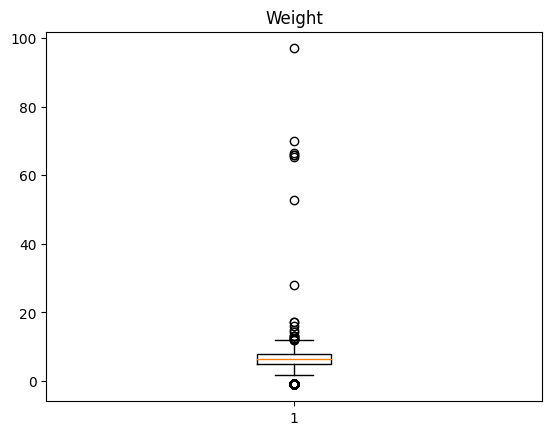

In [58]:
plt.boxplot(df['weight'])
plt.title('Weight')
plt.show()

Revisamos los Outliers con que datos estan relacionados

**Tabla 1. Peso y Estatura para niños de 1 a 12 meses.**

Tomado de: *Arch Argent Pediatr 2009;107(2):126-133* [Scielo.org.ar](http://www.scielo.org.ar/pdf/aap/v107n2/v107n2a05.pdf)

In [62]:
weight = df['weight'] > 12
print(weight.sum())
df.loc[weight,:].head(12)

22


,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight,height,haemoglobin_test,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
psu_id,,,,,,,,,,,,,,,,,,,,,
2833835,1,2014-06-11,30,3,2,1,7.0,12.400000,69.000000,1.0,...,5.0,5.0,5.0,6.0,6.0,6.0,0.0,-1.0,-1.0,UTTARAKHAND
2845464,2,2014-09-25,30,3,2,1,2.0,52.799999,120.500000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2851016,1,2014-06-25,30,3,2,1,10.0,12.500000,-1.000000,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2868191,1,2014-11-19,30,3,2,1,9.0,12.400000,110.100000,2.0,...,6.0,6.0,6.0,6.0,6.0,6.0,0.0,-1.0,-1.0,UTTARAKHAND
2876414,1,2014-07-25,30,3,2,1,9.0,13.000000,88.000000,1.0,...,6.0,7.0,6.0,7.0,7.0,7.0,0.0,-1.0,-1.0,UTTARAKHAND
1084969,2,2013-12-25,7,2,1,1,8.0,17.299999,76.800003,2.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,ASSAM
1084314,1,2014-07-15,30,3,1,1,3.0,14.900000,58.700001,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,ASSAM
1096281,1,2014-02-08,15,3,2,1,4.0,66.400002,63.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,ASSAM
1100380,1,2014-12-22,15,3,1,1,11.0,97.000000,70.000000,2.0,...,5.0,6.0,6.0,6.0,7.0,6.0,0.0,-1.0,-1.0,ASSAM


La tabla anterior muestra los valores correspondientes a outliers en la variable 'weight', para saber los valores en rango normal para la edad revisamos las tablas de relacion peso/talla para niños y niñas menores de 1 año según la Organización Mundial de la Salud ([Scielo.org.ar](http://www.scielo.org.ar/pdf/aap/v107n2/v107n2a05.pdf)), con la que identificamos que el peso promedio para la edad de 12 meses esta al rededor de 10 kg, en la tabla observamos valores extravagantes tales como 97.00 kg de peso para un niño de edad de 11 meses o 66.4 kg de peso para una niña de edad de 4 meses, son valores que sobrepasan los rangos de obesidad infantil habitual en la India, además otras características regsitradas como -1, por lo que pueden corresponder a errores de digitación.
la que creamos una nueva característica "weaght_mean" y "height_mean".

In [ ]:
'''# Definir una función para calcular 'weight_mean' y 'height_mean' basado en las condiciones
def calculate_means(row):
    if row['sex'] == 1 and row['age_code'] == 'd' and row['age'] == 0:
        return pd.Series({'weight_mean': 3.3, 'height_mean': 50.02})
    elif row['sex'] == 1 and row['age_code'] == 'd' and row['age'] < 7:
        return pd.Series({'weight_mean': 3.3, 'height_mean': 51.45})
    elif row['sex'] == 1 and row['age_code'] == 'd' and row['age'] < 15:
        return pd.Series({'weight_mean': 3.8, 'height_mean': 52.1})
    elif row['sex'] == 1 and row['age_code'] == 'd' and row[''''

In [47]:
num = df.select_dtypes(include='number')
num.columns

Index(['test_salt_iodine', 'record_code_iodine', 'sex', 'age_code', 'age',
       'weight_measured', 'weight_in_kg', 'length_height_measured',
       'length_height_cm', 'haemoglobin_test', 'haemoglobin',
       'haemoglobin_level', 'bp_systolic', 'bp_systolic_2_reading',
       'bp_diastolic', 'bp_diastolic_2reading', 'pulse_rate',
       'pulse_rate_2_reading', 'diabetes_test', 'fasting_blood_glucose',
       'fasting_blood_glucose_mg_dl', 'first_breast_feeding',
       'is_cur_breast_feeding', 'day_or_month_for_breast_feeding',
       'water_month', 'ani_milk_month', 'semisolid_month_or_day',
       'solid_month', 'vegetables_month_or_day', 'illness_type',
       'illness_duration', 'treatment_type'],
      dtype='object')

**'is_cur_breast_feeding'**

In [35]:
df['is_cur_breast_feeding'].value_counts()

 1.0    2697
-1.0     263
 2.0     228
Name: is_cur_breast_feeding, dtype: int64

In [39]:
#is_cur_breastfeed = df[df['is_cur_breast_feeding'] == 1]
grup = df.groupby('is_cur_breast_feeding')[['age_code','age' ]].mean()
grup

,age_code,age
is_cur_breast_feeding,,
-1.0,0.965779,6.539924
1.0,0.979607,5.957360
2.0,0.986842,6.719298


> Nota: La agrupación por edad nos muestra que responde a si aun esta amamantando para la edad de 5.9 meses y no para 6.7 meses, -1 no se explica en el diccionario de datos.

In [42]:
is_cur_less1 = df['is_cur_breast_feeding'] == -1
print(is_cur_less1.sum())
df.loc[is_cur_less1,:].head(15)

263


,rural_urban,date_survey,test_salt_iodine,record_code_iodine,sex,age_code,age,weight_measured,weight_in_kg,length_height_measured,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,State
psu_id,,,,,,,,,,,,,,,,,,,,,
2824575,2,20/05/2014,30,3,2,1,4.0,4.0,-1.0,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2834361,1,08/12/2014,30,3,1,0,1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2831539,1,27/05/2014,30,3,2,0,17.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2831778,1,29/05/2014,30,3,2,1,4.0,1.0,5.2,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2828870,1,30/04/2014,15,3,1,1,4.0,1.0,5.4,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2829712,1,07/05/2014,30,3,1,1,6.0,1.0,5.6,4.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2831774,1,30/05/2014,30,3,1,1,3.0,1.0,6.0,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2831775,1,20/05/2014,30,3,2,1,3.0,1.0,6.1,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND
2828871,1,05/01/2014,7,2,1,1,6.0,1.0,6.3,1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,UTTARAKHAND


In [71]:
df['sex'].value_counts()

2    157891
1    157197
Name: sex, dtype: int64

In [ ]:
df['ani_milk_month'].value_counts()

In [ ]:
df['fasting_blood_glucose'].value_counts()

In [ ]:
#verificamos que se hay hecho ccorrectamenbe
df.info()

In [ ]:
df.columns

In [ ]:
df['haemoglobin_test'].value_counts()

In [ ]:
df['haemoglobin'].value_counts()

In [ ]:
df['haemoglobin_level'].value_counts()

In [ ]:
hb = df['haemoglobin_level'] == -1
df.loc[hb,:].head()

In [ ]:
#pendientes por eliminar
'''
  'weight_measured', 'length_height_measured', 'length_height_code', 'haemoglobin_test', 'haemoglobin',
  'diabetes_test', 'fasting_blood_glucose',
'''

In [ ]:
df['rural_urban'].value_counts()

In [ ]:
#Cambiamos el tipo de dato de la columna rural_urban
df['rural_urban'] = df['rural_urban'].astype(int)

In [ ]:
#Verificamos
df['rural_urban'].value_counts()

In [ ]:
df[df['rural_urban']=='Y']

> Nota: el valor de 'Y' no existe en el diccionario de datos por lo que es un error de escritura al parecer, tambien observamos que

In [ ]:
filas_con_valor_especifico = df[df['rural_urban'] == 'Y']

# Identificar las columnas nulas en esas filas
columnas_nulas = filas_con_valor_especifico.columns[filas_con_valor_especifico.isnull().any()]
columnas_nulas.value_counts()

In [ ]:
#df = df[df['rural_urban'] != 'Y']

In [ ]:
cat = df.select_dtypes(include='object')
cat.head()

In [ ]:
df['day_or_month_for_breast_feeding_'].value_counts()

In [ ]:
df['day_or_month_for_breast_feeding_'] = df['day_or_month_for_breast_feeding_'].replace('m', 'M')
df['day_or_month_for_breast_feeding_'].value_counts()

In [ ]:
df.isna().sum()

In [ ]:
day_breast_1 = df['day_or_month_for_breast_feeding_'] == -1
df.loc[day_breast_1,:].head(10)

In [ ]:
df['day_or_month_for_breast_feeding'].value_counts()

In [ ]:
df.info()

In [ ]:
df['test_salt_iodine'].value_counts()

In [ ]:
df['illness_type'].value_counts()

In [ ]:
ilness = df['illness_type']==-1.0
df.loc[ilness,:].head(10)

**Estadisticas generales de los Datos**

In [9]:
df.describe()

,district_code,stratum,ahs_house_unit,house_hold_no,test_salt_iodine,record_code_iodine,sl_no,sex,usual_residance,identification_code,...,day_or_month_for_breast_feeding,water_month,ani_milk_month,semisolid_month_or_day,solid_month,vegetables_month_or_day,illness_type,illness_duration,treatment_type,v54
count,315097.000000,315097.000000,315097.000000,315097.000000,315097.000000,315097.000000,315097.000000,315097.000000,315097.000000,314845.000000,...,315093.000000,315093.000000,315093.000000,315093.000000,315093.000000,315093.000000,315093.000000,315093.000000,315093.000000,0.0
mean,9.899275,1.205692,177.229939,1.393758,22.049023,2.736148,3.174645,1.501087,1.112778,971.463461,...,-0.812938,-0.820659,-0.816648,-0.785349,-0.760309,-0.747570,-0.915914,-0.948666,-0.962744,NaN
std,5.988722,0.731570,156.751705,5.401780,10.301138,0.479711,3.871282,0.500038,0.316382,2125.033772,...,1.138742,1.080889,1.144507,1.335713,1.525504,1.633001,0.406026,0.831459,0.326433,NaN
min,1.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,5.000000,1.000000,64.000000,1.000000,15.000000,3.000000,2.000000,1.000000,1.000000,311.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
50%,9.000000,1.000000,141.000000,1.000000,30.000000,3.000000,3.000000,2.000000,1.000000,694.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
75%,14.000000,2.000000,253.000000,1.000000,30.000000,3.000000,4.000000,2.000000,1.000000,1250.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
max,502.000000,42.000000,9111.000000,1991.000000,33.000000,3.000000,1370.000000,2.000000,2.000000,99999.000000,...,79.000000,73.000000,70.000000,24.000000,30.000000,30.000000,11.000000,365.000000,2.000000,NaN


<ipython-input-19-125b03785314>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = subset_df.corr()


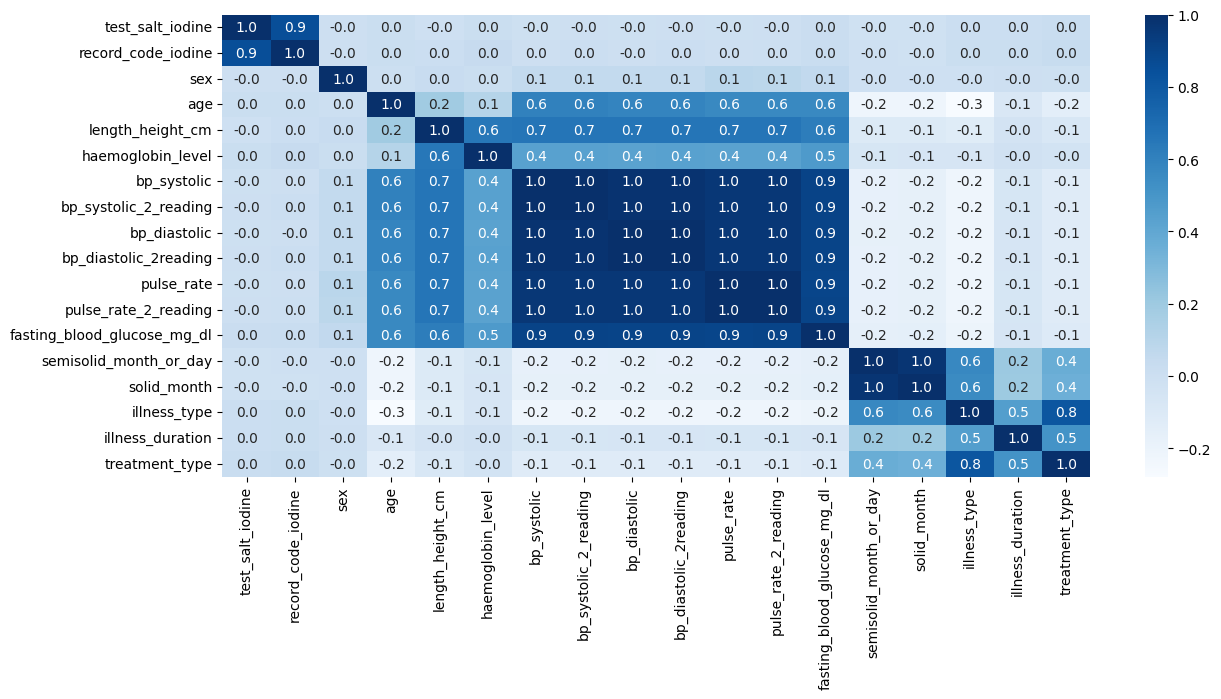

In [19]:
#Buscamos correlaciones entre las columnas
columns_corr = ['rural_urban','test_salt_iodine','record_code_iodine',
                'sex', 'age','length_height_cm','haemoglobin_level',
                'bp_systolic','bp_systolic_2_reading','bp_diastolic',
                'bp_diastolic_2reading','pulse_rate','pulse_rate_2_reading',
                'fasting_blood_glucose_mg_dl','semisolid_month_or_day',
                'solid_month','illness_type','illness_duration',
                'treatment_type']

subset_df = df[columns_corr]
corr = subset_df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap="Blues", annot = True, fmt=".1f");
plt.show();

**Revisamos la correlación entre las columnas**

___

* 1. Se observa una correlacion entre las columnas: 'age', 'length_height_cm', 'haemoglobin_level', 'bp_systolic', 'bp_systolic_2_reading','bp_diastolic', 'bp_diastolic_2reading', 'pulse_rate','pulse_rate_2_reading', 'fasting_blood_glucose_mg_dl'

* 2. Y otra correlacion entre las columnas de: 'semisolid_month_or_day', 'solid_month', 'illness_type', 'illness_duration', y 'treatment_type'.

# **III. Visualización de Datos**

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x="illness_type", y="illness_duration", hue="sex",data=df, palette="coolwarm");

> Nota: Los datos de ILLNESS TYPE corresponden a
* Diarrhoea / Dysentery=1,
* Acute Respiratory Infection=2,
* Fever of any type=3,
* Other illnesses=4,
* No illness=0

- El valor mas alto lo tiene 4= otras enfermedades, seguido de 2= Infeccion Respiratoria. El valor mínimo lo tiene 0= Ninguno. La relación de la presencia de enfermedad aguda es similar para ambos sexos. Los datos encontrados indican que la mayoría de pacientes de la muestra tuvo alguna enfermedad aguda en los últimos 15 días.

In [ ]:
plt.figure(figsize=(12, 7))
sns.stripplot(x="illness_type", y="haemoglobin_level", hue="sex", data=df, palette="coolwarm");

> Nota: Para todos las enfermedades agudas registradas en la encuesta incluso para los casos de no presencia de enfermedad aguda en los últimos 15 días, los niveles de Hemoglobina van desde al rededor 3.0 a 17.0, en la gráfica observamos una diferencia en los niveles de hemoglobina que baja para las mujeres en la enfermedad 1=diarrea/disenteria.